In [ ]:
# !pip install openml

In [2]:
from openml.datasets import get_dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
fashion_mnist = get_dataset("Fashion-MNIST")

C:\Users\Admin\anaconda3\lib\site-packages\openml\datasets\functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [5]:
fashion_mnist

OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

In [6]:
# Using sklearn fetch ml
# from sklearn.datasets import fetch_openml

In [16]:
fashion = fashion_mnist.get_data() 

In [23]:
data  = fashion[0]

In [24]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X = data.drop("class", axis = 1)
y = data["class"]

In [58]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [59]:
data["class"].unique()

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']
Categories (10, object): ['0' < '1' < '2' < '3' ... '6' < '7' < '8' < '9']

In [60]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

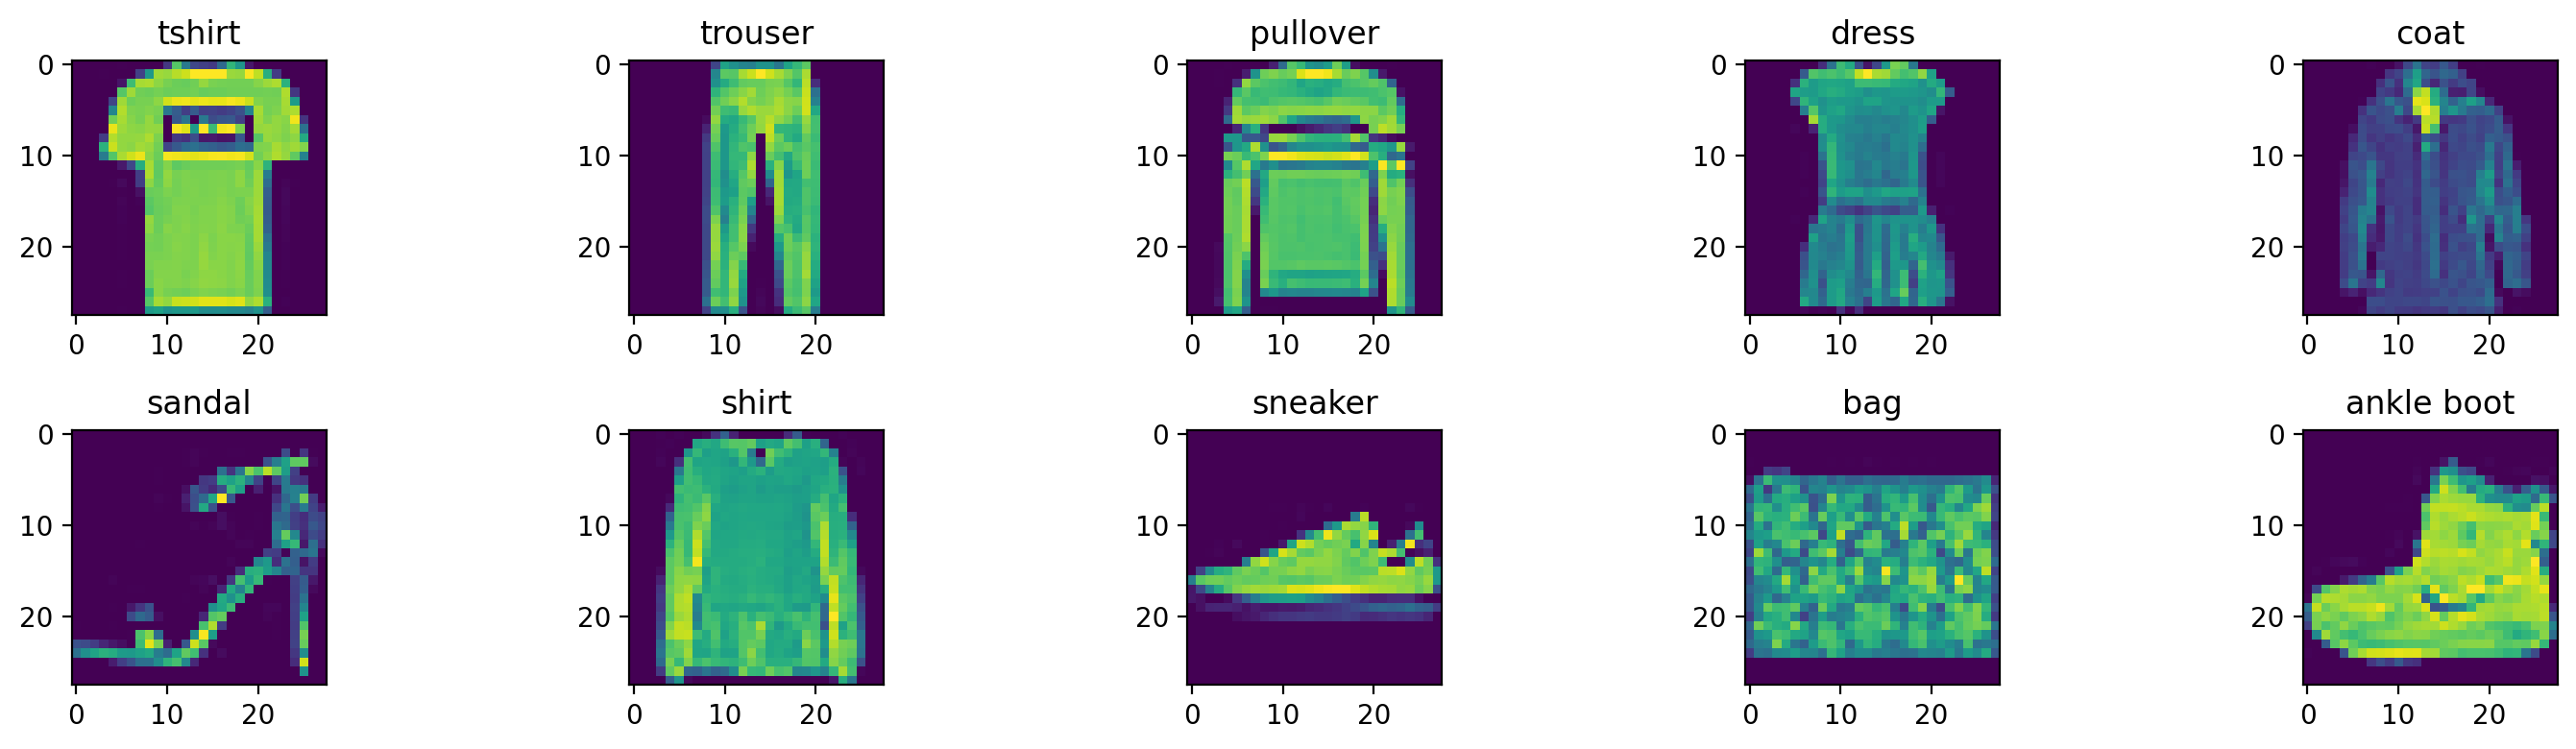

In [61]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])

plt.tight_layout()

In [62]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [64]:
y = y.astype('int')
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int32

In [65]:
# we divide by 255 in order to normalise the data
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.33, random_state=42, stratify=y)

In [66]:
X_train.shape

(46900, 784)

In [67]:
y_train.shape

(46900,)

In [68]:
# Training the model
model1 = tf.keras.models.Sequential() 

In [69]:
model1.add(tf.keras.layers.Flatten(input_shape = (X.shape[1],)))

In [70]:
model1.add(tf.keras.layers.Dense(units=64, activation = "relu"))
model1.add(tf.keras.layers.Dense(units=128, activation = "relu"))
model1.add(tf.keras.layers.Dense(units=10, activation = "softmax"))

In [71]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [72]:
history1 = model1.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1466/1466 [==============================] - 5s 2ms/step - loss: 0.5231 - accuracy: 0.8120
Epoch 2/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3883 - accuracy: 0.8555
Epoch 3/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3476 - accuracy: 0.8713
Epoch 4/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3272 - accuracy: 0.8799
Epoch 5/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3065 - accuracy: 0.8851
Epoch 6/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8887
Epoch 7/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.2809 - accuracy: 0.8944
Epoch 8/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.8990
Epoch 9/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.2601 - accuracy: 0.9013
Epoch 10/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.250

In [73]:
model1.evaluate(X_test, y_test)

722/722 [==============================] - 1s 1ms/step - loss: 0.3413 - accuracy: 0.8831


[0.3413015305995941, 0.8830735683441162]

C:\Users\Admin\AppData\Local\Temp\ipykernel_17712\623558616.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = X_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 21ms/step


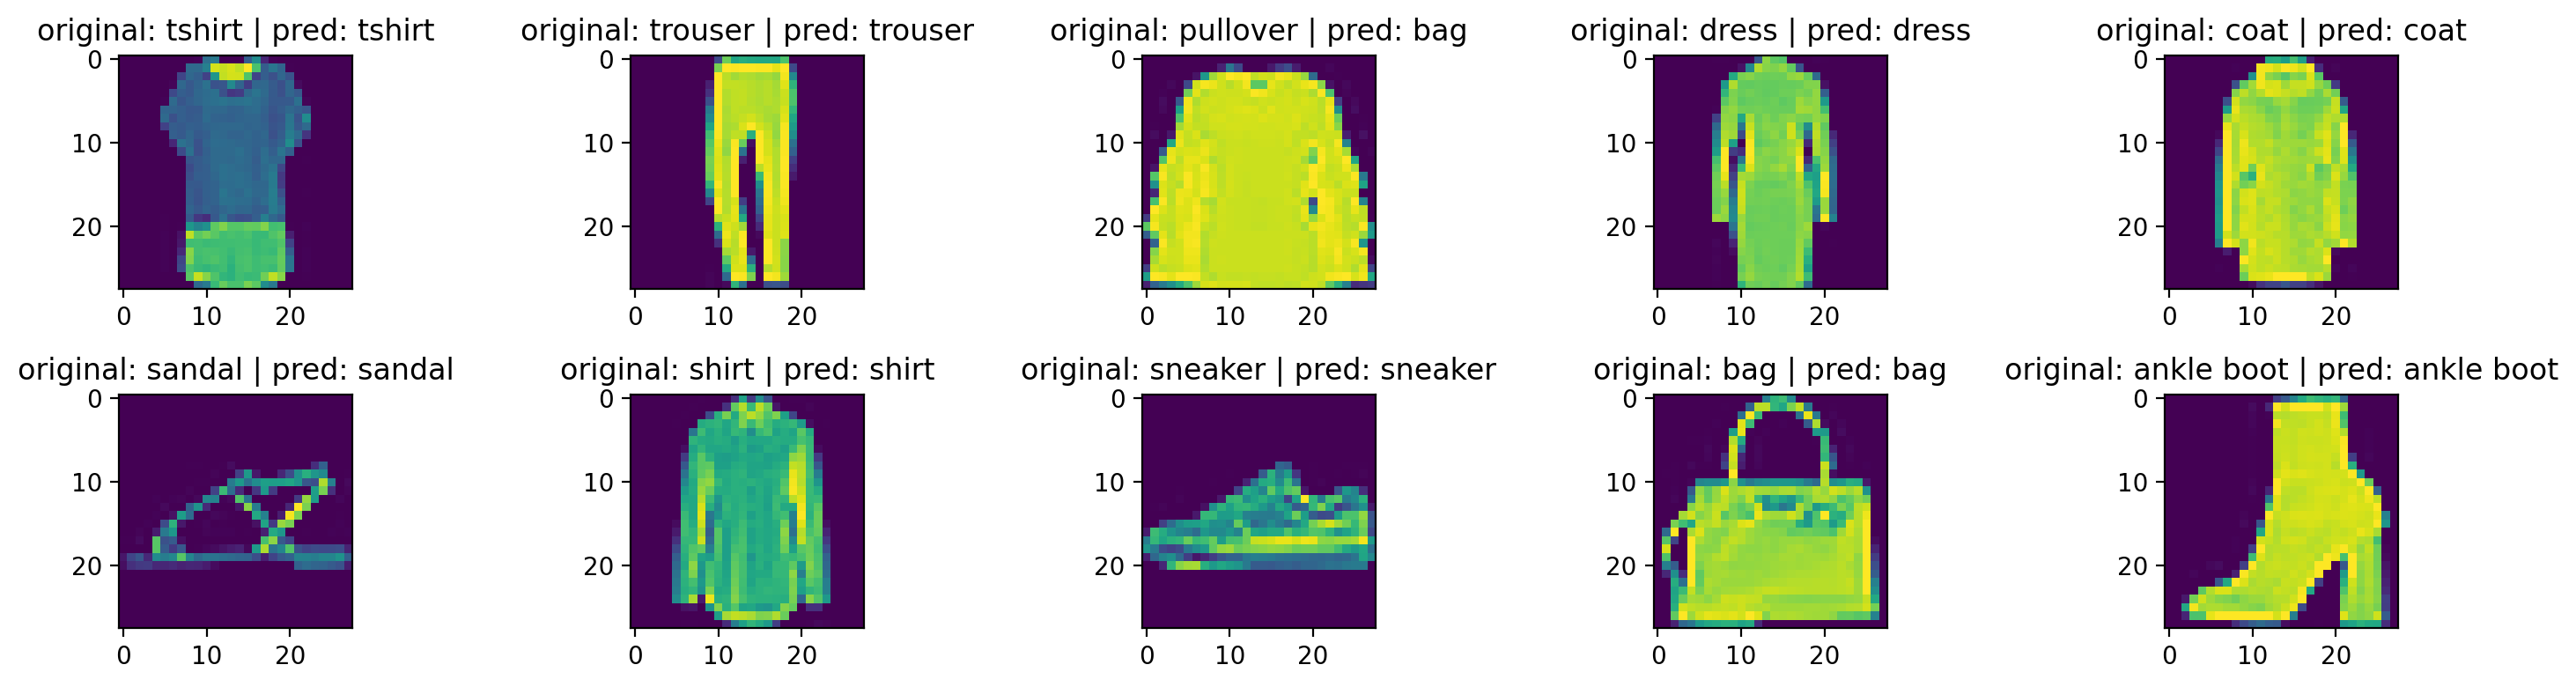

In [75]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  test = X_test[y==i].iloc[0].to_numpy()
  plt.imshow(test.reshape(28,28))

  pred = model1.predict(test.reshape(1,784,))
  idx = np.argmax(pred[0])
  pred_class = classes[idx]

  plt.title('original: {} | pred: {}'.format(classes[i], pred_class))

plt.tight_layout()

In [76]:
pred = model1.predict(test.reshape(1,784,))
idx = np.argmax(pred[0])
pred_class = classes[idx]
pred_class

1/1 [==============================] - 0s 22ms/step


'ankle boot'

In [77]:
pred[0]

array([1.8401839e-15, 2.8166042e-12, 1.3279183e-17, 1.0074264e-15,
       3.1403360e-18, 1.2930860e-06, 4.4097702e-18, 1.9840708e-07,
       6.1294697e-16, 9.9999845e-01], dtype=float32)